In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score, silhouette_score, homogeneity_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_selection =    1    # 0 for wine, 1 for cancer

In [3]:
wine = pd.read_csv('data/wine.csv',sep=';')
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins,labels=group_names)
wine = wine.dropna()
wine_label_quality = LabelEncoder()
wine['quality'] = wine_label_quality.fit_transform(wine['quality'])

cancer = pd.read_csv('data/cancer.csv')
cancer = cancer.dropna()
cancer['class']=cancer['class'].map({4:1, 2:0})

if data_selection == 0:
    X = wine.drop('quality',axis=1)
    y = wine['quality']
    y_save = y
    dataset = 'Wine Dataset'
elif data_selection == 1:
    X = cancer.drop(['id','class'],axis=1)
    y = cancer['class'] 
    y_save = y
    dataset = 'Cancer Dataset'
else:
    print("0 for wine, 1 for cancer")

In [4]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)


In [5]:
clusters = list(range(2,31,1))

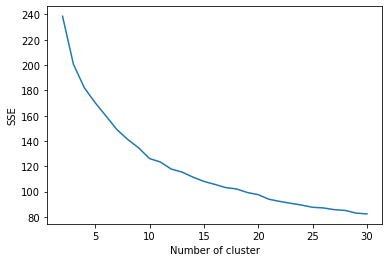

In [6]:
sse = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=44, n_jobs=-2).fit(X)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Look this up

In [7]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(X)
accuracy_score((1-kmeans.labels_), y)

0.9604685212298683

# Look this up

In [8]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(X)
adjusted_mutual_info_score((1-kmeans.labels_), y)

0.7475405677426025

# k-means

For n_clusters=2, The Silhouette Coefficient is 0.5967981179099652
For n_clusters=2, The homogeneity_score is 0.7428932974186745
For n_clusters=3, The Silhouette Coefficient is 0.5245427800691282
For n_clusters=3, The homogeneity_score is 0.8185601027431101
For n_clusters=4, The Silhouette Coefficient is 0.5359408192016307
For n_clusters=4, The homogeneity_score is 0.7953921869578233
For n_clusters=5, The Silhouette Coefficient is 0.2604609354129316
For n_clusters=5, The homogeneity_score is 0.7980148758889682
For n_clusters=6, The Silhouette Coefficient is 0.2563353329814984
For n_clusters=6, The homogeneity_score is 0.79708352383189
For n_clusters=7, The Silhouette Coefficient is 0.256547420146864
For n_clusters=7, The homogeneity_score is 0.7949322577979623
For n_clusters=8, The Silhouette Coefficient is 0.25257151695420116
For n_clusters=8, The homogeneity_score is 0.8526223000934743
For n_clusters=9, The Silhouette Coefficient is 0.2570652501674438
For n_clusters=9, The homogeneit

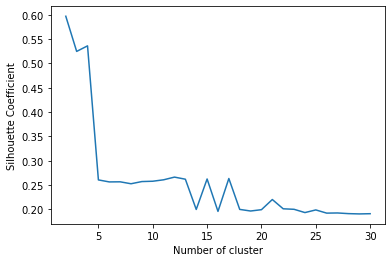

In [9]:
silh = {}
homog = {}
for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, 
                    n_jobs=-2).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

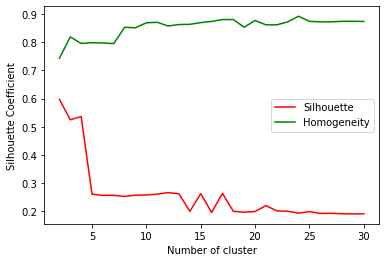

In [10]:
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

# Expectation Maximization

For n_clusters=2, The Silhouette Coefficient is 0.4155386646984106
For n_clusters=2, The homogeneity_score is 0.5722966909207493
For n_clusters=2, The log_likelihood score is 10.199173974247707
For n_clusters=3, The Silhouette Coefficient is 0.31824321949291046
For n_clusters=3, The homogeneity_score is 0.5818789362552834
For n_clusters=3, The log_likelihood score is 11.775515319300704
For n_clusters=4, The Silhouette Coefficient is 0.2696233418006718
For n_clusters=4, The homogeneity_score is 0.6300877552370918
For n_clusters=4, The log_likelihood score is 13.905524779644363
For n_clusters=5, The Silhouette Coefficient is 0.08393999015844637
For n_clusters=5, The homogeneity_score is 0.7418487661007386
For n_clusters=5, The log_likelihood score is 14.218895829677827
For n_clusters=6, The Silhouette Coefficient is 0.10500892009042903
For n_clusters=6, The homogeneity_score is 0.8021997330970975
For n_clusters=6, The log_likelihood score is 15.289105063496772
For n_clusters=7, The Silho

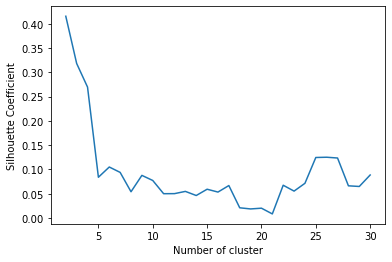

In [11]:
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(X)
    label = gmm.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(X)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

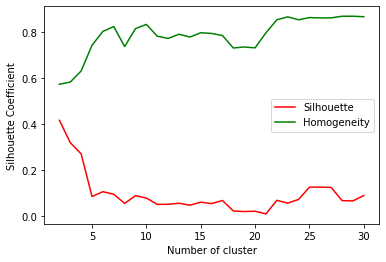

In [12]:
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()), 'r', label="Silhouette")
plt.plot(list(homog_EM.keys()), list(homog_EM.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

In [13]:
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=44, 
                      n_init=5).fit(X)
label = gmm.predict(X)
accuracy_score((1-label), y)

0.8726207906295754